In [4]:
import re

import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
plt.rcParams['figure.figsize'] = (15, 5)

In [40]:
msg_df = pd.read_csv('data/freifahren.tsv', encoding='utf-16', sep='\t', 
                     header=None, 
                     names=['timestamp', 'username', 'forward', 'type', 'text'])[['timestamp', 'type', 'text']]

In [41]:
msg_df = msg_df[msg_df.type != '<call>']

In [42]:
msg_df.describe()

,timestamp,type,text
count,49291,49291,49291
unique,48479,2,43688
top,26.09.2018 21:30:54,<msg>,[Photo]
freq,5,45390,3052


In [44]:
regexp = re.compile("(?:^|\W)([mMsSuU][\W]{0,1}[1-9][\d]*)(?:\W|$)")

In [45]:
msg_df["line"] = msg_df.text.apply(lambda txt: regexp.findall(txt))

In [46]:
msg_df.line.value_counts()

[]           29082
[U8]          2273
[U7]          1369
[U6]          1110
[u8]          1068
             ...  
[u6, u 7]        1
[U8, u7]         1
[M5, M4]         1
[S42, U7]        1
[m49]            1
Name: line, Length: 423, dtype: int64

In [47]:
msg_df = msg_df[[type(lines) == list and len(lines) > 0 for lines in msg_df.line]]

In [48]:
msg_df.line = [re.sub(r'[\W]', "", lines[0]).upper() for lines in msg_df.line]

/home/user/coding-2019/freifahren-reloaded/myvenv/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [49]:
msg_df.line.value_counts()

U8       3523
U7       2134
U6       1655
U1       1385
U2       1151
         ... 
U1351       1
M77         1
M76         1
S19         1
S6          1
Name: line, Length: 65, dtype: int64

In [50]:
msg_df["line_type"] = msg_df.line.apply(lambda line: line[0])

/home/user/coding-2019/freifahren-reloaded/myvenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
msg_df.head()

,timestamp,type,text,line,line_type
49,15.02.2018 17:47:39,<msg>,S25 Oranienburgerstr. Richtung Süden,S25,S
62,15.02.2018 20:25:12,<msg>,"Görli u1, richtung Warschauer ausgestiegen",U1,U
63,15.02.2018 21:20:00,<msg>,U1 Kurfürstenstraße Richtung Uhlandstr,U1,U
77,16.02.2018 13:12:04,<msg>,S3/S5/S7/S9: Berlin Hbf. Kontrolleure sind wei...,S3,S
78,16.02.2018 13:18:43,<msg>,Jmd heute schon die westliche u7 langgefahren ...,U7,U


In [52]:
msg_df.to_csv('data/controls.tsv', sep='\t', encoding='utf-16')

In [53]:
import re
import json
import datetime
from collections import Counter

import pandas as pd
from pandas.io.json import json_normalize

import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [54]:
regexp = re.compile("(?<!\w)([MUS]\W?\d+)(?:\W|$)", re.I)
print(regexp.findall(" S3/S5/s7/s9"))

['S3', 'S5', 's7', 's9']


In [55]:
totalmatches = Counter()

bins = {
    'S41': 'Ring',
    'S42': 'Ring',
    'S1': 'S12',
    'S12': 'S12',
    'S19': 'S12',
    'S2': 'S12',
    'S21': 'S12',
    'S25': 'S12',
    'S26': 'S12',
    'S3': 'S3579',
    'S45': 'Ring',
    'S46': 'Ring',
    'S47': 'Ring',
    'S48': 'Ring',
    'S5': 'S3579',
    'S7': 'S3579',
    'S75': 'S3579',
    'S8': 'Ring',
    'S85': 'Ring',
    'S9': 'S3579',
}


for row in msg_df.iterrows():
    rowbody = row[1]["text"]
    rowmatches = regexp.findall(rowbody)

    #print(rowbody)
    #print(rowmatches)
    for match in rowmatches:
        m = re.sub(r'[\W]', "", match).upper()
        totalmatches[bins.get(m, m)] += 1
        break

In [56]:
total_control_count = sum([val for key, val in totalmatches.items()])

In [57]:
total_control_count

20209

In [58]:
totalmatches

Counter({'S12': 1259,
         'U1': 1385,
         'S3579': 2198,
         'U7': 2134,
         'Ring': 2626,
         'U3': 504,
         'U8': 3523,
         'U2': 1151,
         'M13': 218,
         'M10': 884,
         'M2': 130,
         'U6': 1655,
         'M1': 178,
         'M4': 139,
         'U4': 42,
         'U5': 747,
         'U9': 1026,
         'M45': 5,
         'M29': 39,
         'M19': 9,
         'M85': 8,
         'M46': 10,
         'M12': 10,
         'M17': 36,
         'M5': 40,
         'M6': 45,
         'M48': 10,
         'M41': 48,
         'M21': 7,
         'M27': 11,
         'M44': 6,
         'M49': 2,
         'M8': 91,
         'M25': 1,
         'M77': 1,
         'M76': 1,
         'M11': 1,
         'M16': 4,
         'M50': 11,
         'S421': 1,
         'S4': 3,
         'U10': 2,
         'S24': 3,
         'M37': 1,
         'U25': 1,
         'S6': 1,
         'U42': 1,
         'U1351': 1})

In [59]:
sorted_totalmatches = sorted(list(totalmatches.items()), key=lambda tup: -tup[1])

In [60]:
overall_top_10 = sorted_totalmatches[:10]

In [61]:
overall_top_10

[('U8', 3523),
 ('Ring', 2626),
 ('S3579', 2198),
 ('U7', 2134),
 ('U6', 1655),
 ('U1', 1385),
 ('S12', 1259),
 ('U2', 1151),
 ('U9', 1026),
 ('M10', 884)]

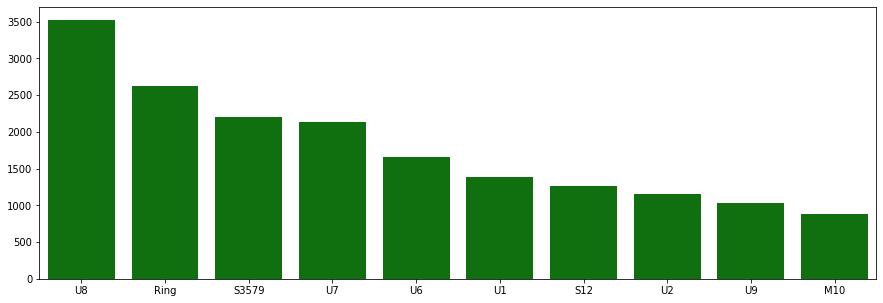

In [62]:
lines = [el[0] for el in overall_top_10]
count = [el[1] for el in overall_top_10]
sns.barplot(x=lines, y=count, color="green")

In [63]:
sbahncounts = list(filter(lambda tup: tup[0][0] == "S" or tup[0] == "Ring", sorted_totalmatches))[:10]

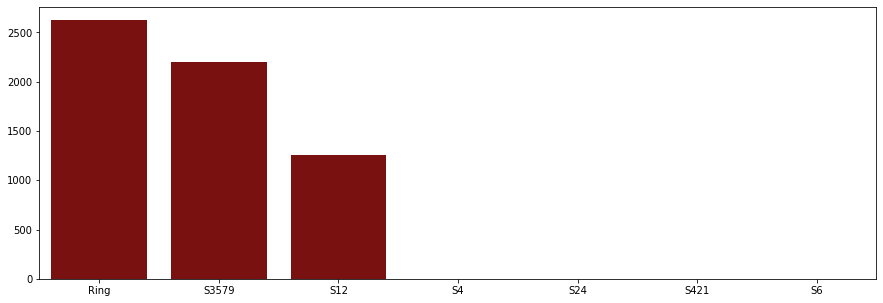

In [64]:
lines = [el[0] for el in sbahncounts]
count = [el[1] for el in sbahncounts]
sns.barplot(x=lines, y=count, color="darkred")

In [65]:
sum(count)

6091

In [66]:
tramcounts = list(filter(lambda tup: tup[0][0] == "M", sorted_totalmatches))[:10]

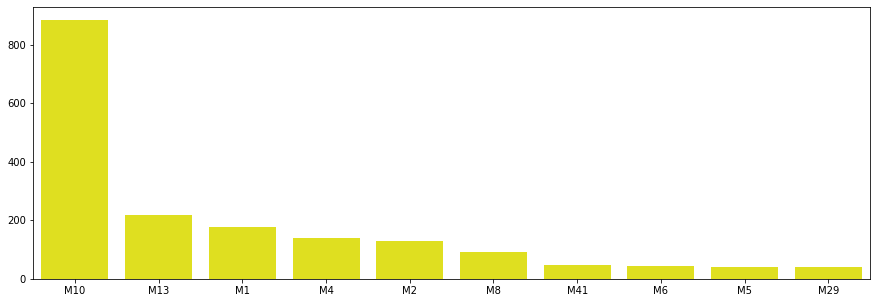

In [67]:
lines = [el[0] for el in tramcounts]
count = [el[1] for el in tramcounts]
sns.barplot(x=lines, y=count, color="yellow")

In [68]:
ubahncounts = list(filter(lambda tup: tup[0][0] == "U", sorted_totalmatches))[:10]

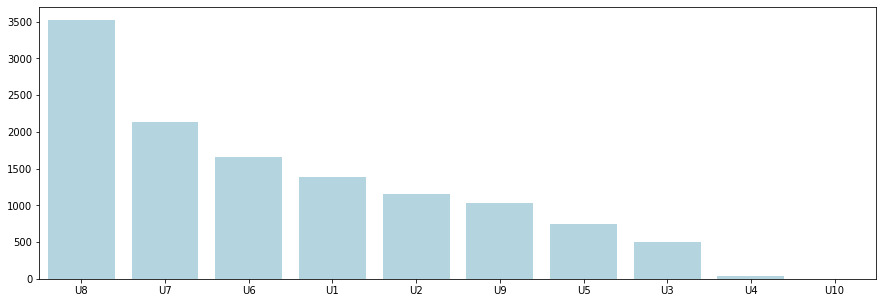

In [69]:
lines = [el[0] for el in ubahncounts]
count = [el[1] for el in ubahncounts]
sns.barplot(x=lines, y=count, color="lightblue")

In [39]:
sum(count)

12169